## Data Analysis using BulkLMM - BXD Longevity Study

In [1]:
using CSV, DelimitedFiles, DataFrames, Missings, XLSX
using LinearAlgebra, Statistics, Optim
using Random, Distributions, LoopVectorization
# using GeneNetworkAPI, Downloads
using BenchmarkTools

In [2]:
using Plots

In [3]:
local_path = "../../BulkLMM.jl/src";

## Load processed_data:

### By individuals:

In [4]:
pwd()

"/home/zyu20/git/BulkLMM_Analyses/BXDLongevity"

In [5]:
BXD_pheno_ind_summary_df = CSV.read("../../../shareddata/BXDLongevity/data/GN886_pheno_summary.csv", DataFrame);

By individuals, there are 248 individual samples for 32445 livear proteome.

In [6]:
println(size(BXD_pheno_ind_summary_df)) 
BXD_pheno_ind_summary_df[1:10, 1:10]

(248, 32448)


10×10 DataFrame
 Row │ Sample   Strain   Strain_num  P42209_DESGLNRK_2  P42209_GLRPLDVAFLR_3   ⋯
     │ String7  String7  Int64       Float64            Float64                ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ H1009    BXD9              9             11.349                11.534   ⋯
   2 │ H0370    BXD9              9             11.249                12.735
   3 │ H2577    BXD9              9             12.415                10.487
   4 │ H0365    BXD9              9             11.374                10.674
   5 │ H1333    BXD13            13             11.687                11.524   ⋯
   6 │ H2259    BXD24            24             11.837                11.715
   7 │ H1792    BXD24            24             11.563                11.434
   8 │ H1791    BXD24            24             12.5                  12.273
   9 │ H1541    BXD24            24             11.815                11.564   ⋯
  10 │ H1277    BXD24            24             12.674                11.743
                                                               5 columns omitted

In [7]:
BXD_geno_ind_summary_df = CSV.read("../../../shareddata/BXDLongevity/data/GN886_geno_summary.csv", DataFrame);

By individuals, there are 248 individual samples for 7321 markers.

In [8]:
println(size(BXD_geno_ind_summary_df)) 
BXD_geno_ind_summary_df[1:10, 1:10]

(248, 7324)


10×10 DataFrame
 Row │ Sample   Strain   Strain_num  rs31443144  rs6269442  rs32285189  rs2583 ⋯
     │ String7  String7  Int64       Float64     Float64    Float64     Float6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ H1009    BXD9              9         0.0        0.0         0.0         ⋯
   2 │ H0370    BXD9              9         0.0        0.0         0.0
   3 │ H2577    BXD9              9         0.0        0.0         0.0
   4 │ H0365    BXD9              9         0.0        0.0         0.0
   5 │ H1333    BXD13            13         0.0        0.0         0.0         ⋯
   6 │ H2259    BXD24            24         0.0        0.0         0.0
   7 │ H1792    BXD24            24         0.0        0.0         0.0
   8 │ H1791    BXD24            24         0.0        0.0         0.0
   9 │ H1541    BXD24            24         0.0        0.0         0.0         ⋯
  10 │ H1277    BXD24            24         0.0        0.0         0.0
                                                               4 columns omitted

### By strains:

In [9]:
pwd()

"/home/zyu20/git/BulkLMM_Analyses/BXDLongevity"

In [10]:
BXD_pheno_strains_summary_df = CSV.read("../../../shareddata/BXDLongevity/data/GN886_pheno_strain_means_summary.csv", DataFrame);

By strains, there are 50 BXD strains for 32445 liver proteome.

In [11]:
println(size(BXD_pheno_strains_summary_df)) 
BXD_pheno_strains_summary_df[1:10, 1:10]

(50, 32447)


10×10 DataFrame
 Row │ Strain   Number of Samples  P42209_DESGLNRK_2  P42209_GLRPLDVAFLR_3  Q9 ⋯
     │ String7  Int64              Float64            Float64               Fl ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ BXD9                     4            11.5968               11.3575     ⋯
   2 │ BXD13                    1            11.687                11.524
   3 │ BXD24                    5            12.0778               11.7458
   4 │ BXD27                    3            11.717                11.149
   5 │ BXD29                   11            11.735                11.3496     ⋯
   6 │ BXD32                    8            11.6266               11.554
   7 │ BXD34                   13            11.7491               11.9135
   8 │ BXD39                    5            11.9158               11.719
   9 │ BXD40                    8            11.8651               11.6817     ⋯
  10 │ BXD43                    4            12.378                11.4563
                                                               6 columns omitted

In [12]:
BXD_geno_strains_summary_df = CSV.read("../../../shareddata/BXDLongevity/data/GN886_geno_strains_summary.csv", DataFrame);

By strains, there are 50 BXD strains for 7321 markers.

In [13]:
println(size(BXD_geno_strains_summary_df)) 
BXD_geno_strains_summary_df[1:10, 1:10]

(50, 7322)


10×10 DataFrame
 Row │ Strain   rs31443144  rs6269442  rs32285189  rs258367496  rs32430919  rs ⋯
     │ String7  Float64     Float64    Float64     Float64      Float64     Fl ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ BXD9            0.0        0.0         0.0          0.0         0.0     ⋯
   2 │ BXD13           0.0        0.0         0.0          0.0         0.0
   3 │ BXD24           0.0        0.0         0.0          0.0         0.0
   4 │ BXD27           0.0        0.0         0.0          0.0         0.0
   5 │ BXD29           1.0        1.0         1.0          1.0         1.0     ⋯
   6 │ BXD32           0.0        0.0         0.0          0.0         0.0
   7 │ BXD34           0.0        0.0         0.0          0.0         0.0
   8 │ BXD39           1.0        1.0         1.0          1.0         1.0
   9 │ BXD40           0.0        0.0         0.0          0.0         0.0     ⋯
  10 │ BXD43           0.0        0.0         0.0          0.0         0.0
                                                               4 columns omitted

## Load functions:

In [14]:
pwd()

"/home/zyu20/git/BulkLMM_Analyses/BXDLongevity"

In [15]:
include(joinpath(local_path, "kinship.jl"));
include(joinpath(local_path, "util.jl"));
include(joinpath(local_path, "wls.jl"));
include(joinpath(local_path, "lmm.jl"));
include(joinpath(local_path, "gridbrent.jl"));
include(joinpath(local_path, "transform_helpers.jl"));
include(joinpath(local_path, "scan.jl"));
include(joinpath(local_path, "bulkscan_helpers.jl"));
include(joinpath(local_path, "bulkscan.jl"));
include(joinpath(local_path, "readData.jl"));
include(joinpath(local_path, "analysis_helpers/single_trait_analysis.jl"));
include("../../BigRiver_util_code/src/kinship_utils.jl");

## Objectives

- gemma one trait, ind and strains

- scan_alt one trait, ind and strains

- scan_null one trait, ind and strains

- bulkscan_grid (null), all traits, ...

- data structure for all traits results...

- Heatmap grids_taken, compare on strain means and individuals

- Histogram of heritabilities (null) for all traits (both strain means and individual level data)

- Loglikelihood by h2_grid plot, strain means v.s. individuals

- Report fixed effects:

- Adjusting difference in the number of samples across strains

- Histogram of heritabilities (null) for all traits (both strain means and individual level data)

## Run BulkLMM.jl:

### Calculate kinship:

First, calculate the kinship matrix of relatedness among the strains (50-by-50):

In [16]:
geno_strains = Matrix{Float64}(BXD_geno_strains_summary_df[:, 2:end]);

In [17]:
@time kinship_strains = calcKinship(geno_strains);

  0.003722 seconds (8 allocations: 2.831 MiB)


Then, construct the kinship matrix of relatedness among the individuals based on which strain they are from:

In [18]:
BXD_geno_ind_summary_df.Strain_num = Vector{Int64}(BXD_geno_ind_summary_df.Strain_num);

In [19]:
@time kinship_ind_from_strains = calcKinship2(kinship_strains, BXD_geno_ind_summary_df.Strain_num);

  0.096464 seconds (103.26 k allocations: 5.984 MiB, 96.12% compilation time)


### Single-trait genome scans:

To see single trait genome scan results, we take the 29437-th livear proteomic as the single trait to run analysis:  

In [20]:
lp_names = names(BXD_pheno_ind_summary_df)[4:end];

In [21]:
lp_id = 29437;
lp_names[lp_id]

"Q9Z2I8_SSGLPITSAVDLEDAAK_3"

In [22]:
prior = [1.0, 0.0];

#### For individual liver proteome

In [23]:
geno_ind = Matrix{Float64}(BXD_geno_ind_summary_df[:, 4:end]);

In [24]:
lp_ind_Y = Matrix{Float64}(BXD_pheno_ind_summary_df[:, 4:end]);
lp_ind_y = reshape(lp_ind_Y[:, lp_id], :, 1);

In [25]:
lpst_ind_Y = colStandardize(lp_ind_Y);
lpst_ind_y = reshape(lpst_ind_Y[:, lp_id], :, 1);

In [50]:
@time scan_results_ind = scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
                              prior_variance = 1.0, prior_sample_size = 0.1, reml = true);

  0.192781 seconds (80.92 k allocations: 134.861 MiB)


In [51]:
@time scan_results_ind_alt = scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
                                  assumption = "alt", 
                                  prior_variance = prior[1], prior_sample_size = prior[2], reml = true);

  4.374772 seconds (3.44 M allocations: 3.949 GiB, 6.61% gc time, 0.97% compilation time)


In [52]:
@time scan_perms_results_ind = scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
                                    prior_variance = prior[1], prior_sample_size = prior[2],
                                    permutation_test = true, nperms = 1000, reml = true);

  0.150631 seconds (212.12 k allocations: 223.886 MiB, 25.37% compilation time)


In [53]:
single_results_ind = DataFrame(hcat(scan_results_ind.lod, scan_results_ind_alt.lod, scan_perms_results_ind.lod), ["scan_null", "scan_alt", "scan_perms.original"]);

In [54]:
single_results_ind[1:6, :]

6×3 DataFrame
 Row │ scan_null  scan_alt  scan_perms.original 
     │ Float64    Float64   Float64             
─────┼──────────────────────────────────────────
   1 │   0.42274   0.43496             0.422737
   2 │   0.42274   0.43496             0.422737
   3 │   0.42274   0.43496             0.422737
   4 │   0.42274   0.43496             0.422737
   5 │   0.42274   0.43496             0.422737
   6 │   0.42274   0.43496             0.422737

#### For liver proteome means by strains

In [42]:
lp_strains_Y = Matrix{Float64}(BXD_pheno_strains_summary_df[:, 3:end]);
lp_strains_y = reshape(lp_strains_Y[:, lp_id], :, 1);

In [43]:
lpst_strains_Y = colStandardize(lp_strains_Y);
lpst_strains_y = reshape(lpst_strains_Y[:, lp_id], :, 1);

In [44]:
@time scan_results_strains = scan(lpst_strains_y, geno_strains, kinship_strains; 
                                  prior_variance = prior[1], prior_sample_size = prior[2],
                                  optim_interval = 4);

  0.041254 seconds (84.33 k allocations: 33.220 MiB)


In [45]:
@time scan_results_strains_alt = scan(lpst_strains_y, geno_strains, kinship_strains;
                                      assumption = "alt",
                                      prior_variance = prior[1], prior_sample_size = prior[2]);

  3.307696 seconds (7.05 M allocations: 2.150 GiB, 8.11% gc time)


In [46]:
@time scan_perms_results_strains = scan(lpst_strains_y, geno_strains, kinship_strains;
                                        permutation_test = true, nperms = 1000, 
                                        prior_variance = prior[1], prior_sample_size = prior[2]);

  0.125904 seconds (90.54 k allocations: 134.722 MiB, 50.63% gc time)


In [47]:
single_results_strains = DataFrame(hcat(scan_results_strains.lod, scan_results_strains_alt.lod, scan_perms_results_strains.lod), ["scan_null", "scan_alt", "scan_perms.original"]);

In [48]:
single_results_strains[1:6, :]

6×3 DataFrame
 Row │ scan_null  scan_alt  scan_perms.original 
     │ Float64    Float64   Float64             
─────┼──────────────────────────────────────────
   1 │  0.387771  0.267201             0.387771
   2 │  0.387771  0.267201             0.387771
   3 │  0.387771  0.267201             0.387771
   4 │  0.387771  0.267201             0.387771
   5 │  0.387771  0.267201             0.387771
   6 │  0.387771  0.267201             0.387771

### Multiple-trait genome scans:

In [55]:
BLAS.set_num_threads(Threads.nthreads())

In [56]:
BLAS.get_num_threads()

16

using a grid of stepsize 0.10, 0.05, 0.01...

In [125]:
grid_list10 = collect(0:9).*0.1;
grid_list20 = collect(0.0:0.05:0.95);
grid_list100 = collect(0.0:0.01:0.99);

#### For individual liver proteome

In [64]:
size(lpst_ind_Y)

(248, 32445)

In [65]:
size(lpst_strains_Y)

(50, 32445)

In [61]:
@time bulkscan_results_ind_null = bulkscan_null(lp_ind_Y, geno_ind, kinship_ind_from_strains; nb = Threads.nthreads(),
                                                prior_variance = 1.0, prior_sample_size = 0.0, optim_interval = 1, 
                                                reml = true);

177.973859 seconds (2.59 G allocations: 1.801 TiB, 10.72% gc time, 0.22% compilation time)


In [119]:
BLAS.set_num_threads(Threads.nthreads())

In [118]:
BLAS.get_num_threads()

16

In [ ]:
@time bulkscan_results_ind_alt_grid10 = bulkscan_alt_grid(lp_ind_Y, geno_ind, kinship_ind_from_strains, grid_list10;
                                                          reml = true);

 61.179073 seconds (8.58 M allocations: 87.830 GiB, 17.91% gc time)


In [ ]:
@time bulkscan_results_ind_alt_grid20 = bulkscan_alt_grid(lp_ind_Y, geno_ind, kinship_ind_from_strains, grid_list20;
                                                          reml = true);

116.396469 seconds (16.81 M allocations: 164.944 GiB, 18.61% gc time)


In [ ]:
@time bulkscan_results_ind_alt_grid100 = bulkscan_alt_grid(lp_ind_Y, geno_ind, kinship_ind_from_strains, grid_list100;
                                                           reml = true);

561.940454 seconds (82.61 M allocations: 781.862 GiB, 19.05% gc time)


In [ ]:
@time bulkscan_results_ind_null_grid10 = bulkscan_null_grid(lp_ind_Y, geno_ind, kinship_ind_from_strains, grid_list10; 
                                                            reml = true);

  8.669273 seconds (5.43 M allocations: 7.790 GiB, 55.90% gc time)


In [ ]:
@time bulkscan_results_ind_null_grid20 = bulkscan_null_grid(lp_ind_Y, geno_ind, kinship_ind_from_strains, grid_list20;
                                                            reml = true);

 14.261412 seconds (10.10 M allocations: 11.633 GiB, 61.97% gc time)


In [ ]:
@time bulkscan_results_ind_null_grid100 = bulkscan_null_grid(lp_ind_Y, geno_ind, kinship_ind_from_strains, grid_list100;
                                                             reml = true);

 52.704584 seconds (47.11 M allocations: 42.099 GiB, 63.46% gc time)


In [135]:
writedlm("output/bulklmm_L_ind_null_grid10.txt", bulkscan_results_ind_null_grid10.L, '\t')

In [136]:
writedlm("output/bulklmm_L_ind_null_grid20.txt", bulkscan_results_ind_null_grid20.L, '\t')

In [137]:
writedlm("output/bulklmm_L_ind_null_grid100.txt", bulkscan_results_ind_null_grid100.L, '\t')

#### For liver proteome means by strains

In [74]:
@time bulkscan_results_strains_null = bulkscan_null(lpst_strains_Y, geno_strains, kinship_strains; nb = Threads.nthreads(),
                                                    prior_variance = 1.0, prior_sample_size = 0.0, optim_interval = 1);

 61.955735 seconds (2.61 G allocations: 434.480 GiB, 30.39% gc time)


In [75]:
BLAS.set_num_threads(Threads.nthreads())

In [76]:
@time bulkscan_results_strains_alt_grid = bulkscan_alt_grid(lpst_strains_Y, geno_strains, kinship_strains, grid_list);

 54.127795 seconds (8.58 M allocations: 82.889 GiB, 11.37% gc time)


In [77]:
@time bulkscan_results_strains_null_grid = bulkscan_null_grid(lpst_strains_Y, geno_strains, kinship_strains, grid_list;
                                                              prior_variance = 1.0, prior_sample_size = 0.0);

  2.857330 seconds (5.20 M allocations: 4.478 GiB, 28.80% gc time)


In [78]:
pwd()

"/home/zyu20/git/BulkLMM_Analyses/BXDLongevity"

#### Compare with linear models:

In [217]:
kinship_id = diagm(ones(size(lpst_ind_Y, 1)));

In [ ]:
bulkscan_results_ind_null_grid.L

In [232]:
@time bulkscan_results_ind_null_grid_id = bulkscan_null_grid(lpst_ind_Y, geno_ind, kinship_id, grid_list;
                                                             prior_variance = 1.0, prior_sample_size = 0.0,
                                                             reml = true);

 10.447053 seconds (8.77 M allocations: 10.450 GiB, 56.10% gc time)


In [234]:
mean(bulkscan_results_ind_null_grid.L .- bulkscan_results_ind_null_grid_id.L .> 0.0)

0.19878216145848956

### Peformance check:

#### Individual data:
- n = 248
- m = 32445
- p = 7321

In [54]:
size(lpst_ind_Y)

(248, 32445)

In [55]:
size(geno_ind)

(248, 7321)

In [56]:
@benchmark scan(lpst_ind_y, geno_ind, kinship_ind_from_strains)

BenchmarkTools.Trial: 33 samples with 1 evaluation.
 Range (min … max):  149.057 ms … 157.293 ms  ┊ GC (min … max): 8.52% … 7.97%
 Time  (median):     153.307 ms               ┊ GC (median):    8.46%
 Time  (mean ± σ):   153.401 ms ±   1.789 ms  ┊ GC (mean ± σ):  8.43% ± 0.11%

                              ██   ▁   ▁ ▁▁     ▁                
  ▆▁▆▁▁▁▁▁▆▁▁▁▆▁▁▁▁▁▁▆▁▁▁▁▁▁▆▆██▆▆▁█▁▆▆█▁██▁▁▁▆▁█▁▁▆▁▁▆▁▁▁▁▁▁▁▆ ▁
  149 ms           Histogram: frequency by time          157 ms <

 Memory estimate: 136.22 MiB, allocs estimate: 82175.

In [57]:
@benchmark scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
                prior_variance = 1.0, prior_sample_size = 0.1)

BenchmarkTools.Trial: 33 samples with 1 evaluation.
 Range (min … max):  152.088 ms … 155.242 ms  ┊ GC (min … max): 8.57% … 8.57%
 Time  (median):     153.701 ms               ┊ GC (median):    8.67%
 Time  (mean ± σ):   153.662 ms ± 593.564 μs  ┊ GC (mean ± σ):  8.66% ± 0.05%

                         ▅            █                          
  ▅▁▁▁▁▁▁▁▁▁▁▅▁▁▁▁▅▁█▅▁▅▁█▅▁▁▅█▁▅▅█▁▁▁█▅█▅▅▅▁▅▁▅▁▁▁▁▁▁▁▁▁▁▁▁▁▁▅ ▁
  152 ms           Histogram: frequency by time          155 ms <

 Memory estimate: 136.22 MiB, allocs estimate: 82175.

In [58]:
@benchmark scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
                assumption = "alt")

BenchmarkTools.Trial: 1 sample with 1 evaluation.
 Single result which took 13.837 s (9.78% GC) to evaluate,
 with a memory estimate of 14.74 GiB, over 12021308 allocations.

In [59]:
@benchmark scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
                assumption = "alt", 
                prior_variance = 1.0, prior_sample_size = 0.1)

BenchmarkTools.Trial: 1 sample with 1 evaluation.
 Single result which took 13.850 s (9.76% GC) to evaluate,
 with a memory estimate of 14.74 GiB, over 12022547 allocations.

In [60]:
BLAS.get_num_threads()

16

In [61]:
@time bulkscan_null(lpst_ind_Y, geno_ind, kinship_ind_from_strains,
                    prior_variance = 1.0, prior_sample_size = 0.1);

230.816431 seconds (2.60 G allocations: 1.813 TiB, 49.17% gc time)


In [62]:
grid_perf = collect(0.0:0.05:0.95);

#### Strain mean data:
- n = 50
- m = 32445
- p = 7321

In [63]:
size(lpst_strains_Y)

(50, 32445)

In [64]:
size(geno_strains)

(50, 7321)

In [65]:
@benchmark scan(lpst_strains_y, geno_strains, kinship_strains)

BenchmarkTools.Trial: 136 samples with 1 evaluation.
 Range (min … max):  32.481 ms … 44.571 ms  ┊ GC (min … max):  0.00% … 0.00%
 Time  (median):     37.591 ms              ┊ GC (median):    12.01%
 Time  (mean ± σ):   36.917 ms ±  2.292 ms  ┊ GC (mean ± σ):   9.08% ± 5.31%

                               ▄█▂                             
  ▄▄▇▅▃▃▄▅▃▁▃▄▁▁▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁███▆██▆▇▃▅▃▃▃▄▁▁▁▃▁▁▃▁▁▁▁▁▁▁▁▃ ▃
  32.5 ms         Histogram: frequency by time        42.3 ms <

 Memory estimate: 32.42 MiB, allocs estimate: 81398.

In [66]:
@benchmark scan(lpst_strains_y, geno_strains, kinship_strains;
                prior_variance = 1.0, prior_sample_size = 0.1)

BenchmarkTools.Trial: 136 samples with 1 evaluation.
 Range (min … max):  32.355 ms … 45.625 ms  ┊ GC (min … max):  0.00% … 0.00%
 Time  (median):     37.684 ms              ┊ GC (median):    12.03%
 Time  (mean ± σ):   36.816 ms ±  2.479 ms  ┊ GC (mean ± σ):   9.09% ± 5.39%

     ▁                             ▁██▂█▁ ▁▂                   
  ▄▇███▆▄▃▁▁▃▁▁▃▁▁▁▃▁▁▁▁▁▁▁▁▁▁▁▁▁▃▆██████▃██▁▄▅▃▃▁▃▃▃▃▃▁▁▁▃▁▃ ▃
  32.4 ms         Histogram: frequency by time        41.2 ms <

 Memory estimate: 32.32 MiB, allocs estimate: 81020.

In [67]:
@benchmark scan(lpst_strains_y, geno_strains, kinship_strains;
                assumption = "alt")

BenchmarkTools.Trial: 3 samples with 1 evaluation.
 Range (min … max):  1.953 s …   2.022 s  ┊ GC (min … max):  9.95% … 11.61%
 Time  (median):     1.972 s              ┊ GC (median):    10.37%
 Time  (mean ± σ):   1.982 s ± 35.537 ms  ┊ GC (mean ± σ):  10.65% ±  0.87%

  █               █                                       █  
  █▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  1.95 s         Histogram: frequency by time        2.02 s <

 Memory estimate: 2.15 GiB, allocs estimate: 7047353.

In [68]:
@benchmark scan(lpst_strains_y, geno_strains, kinship_strains;
                assumption = "alt", 
                prior_variance = 1.0, prior_sample_size = 0.1)

BenchmarkTools.Trial: 5 samples with 1 evaluation.
 Range (min … max):  1.192 s …   1.219 s  ┊ GC (min … max): 8.37% … 8.80%
 Time  (median):     1.201 s              ┊ GC (median):    8.43%
 Time  (mean ± σ):   1.203 s ± 10.559 ms  ┊ GC (mean ± σ):  8.50% ± 0.17%

  █       █          █       █                            █  
  █▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  1.19 s         Histogram: frequency by time        1.22 s <

 Memory estimate: 1.33 GiB, allocs estimate: 4410740.

In [69]:
BLAS.get_num_threads()

1

In [70]:
@time bulkscan_null(lpst_strains_Y, geno_strains, kinship_strains,
                    prior_variance = 1.0, prior_sample_size = 0.1);

 47.601304 seconds (2.61 G allocations: 434.449 GiB, 37.95% gc time)


In [71]:
grid_perf = collect(0.0:0.05:0.95);

In [ ]:
grid_ = collect(0.0:0.05:0.95);

In [72]:
@benchmark bulkscan_null_grid(lpst_strains_Y, geno_strains, kinship_strains, grid_perf;
                              prior_variance = 1.0, prior_sample_size = 0.1)

BenchmarkTools.Trial: 2 samples with 1 evaluation.
 Range (min … max):  3.723 s …    4.049 s  ┊ GC (min … max): 20.30% … 26.18%
 Time  (median):     3.886 s               ┊ GC (median):    23.37%
 Time  (mean ± σ):   3.886 s ± 230.598 ms  ┊ GC (mean ± σ):  23.37% ±  4.16%

  █                                                        █  
  █▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  3.72 s         Histogram: frequency by time         4.05 s <

 Memory estimate: 5.29 GiB, allocs estimate: 9474490.

In [73]:
@benchmark bulkscan_alt_grid(lpst_strains_Y, geno_strains, kinship_strains, grid_perf)

BenchmarkTools.Trial: 1 sample with 1 evaluation.
 Single result which took 113.765 s (11.10% GC) to evaluate,
 with a memory estimate of 155.13 GiB, over 16806384 allocations.

In [74]:
grid_fine = collect(0.00:0.01:0.99);

## Compare with GEMMA:

In [144]:
include("../../BigRiver_util_code/src/run_gemma_utils.jl");

In [145]:
m = size(lpst_ind_Y, 2)

32445

In [146]:
p = size(geno_ind, 2)

7321

In [147]:
# samples = sample(1:m, 1000);
samples = Int.(readdlm("output/samples1000.txt")) |> vec

1000-element Vector{Int64}:
  8203
   889
   699
 23309
 20495
 16822
 19001
  3783
  7407
 16682
  8547
  1260
  6436
     ⋮
 24501
  7848
 23230
  1742
 28677
 16358
  2786
 22274
  1747
  3864
 25541
  1157

In [79]:
marker_names = names(BXD_geno_strains_summary_df)[2:end];

#### strains:

In [80]:
pheno_strains_subset = lpst_strains_Y[:, samples];

In [81]:
t_strains = @elapsed gemma_L_strains = run_gemma(pheno_strains_subset, geno_strains, kinship_strains,
                                                ["A", "B"], marker_names, 
                                                "data/GEMMA_data/GN886_pheno_strains_y.txt", "data/GEMMA_data/GN886_geno_strains.txt", "data/GEMMA_data/kinship_strains.txt", "results_strains",
                                                "/home/zyu20/Softwares/gemma-0.98.5-linux-static-AMD64")

GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.72234
se(pve) =0.608306
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0732021
se(pve) =0.454556
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.155141
se(pve) =0.313202
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.876266
se(pve) =0.45846
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.01849
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.181258
se(pve) =0.329138
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0855462
se(pve) =0.31579
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.810722
se(pve) =0.312347
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.324951
se(pve) =0.302206
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.762116
se(pve) =0.313086
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.435769
se(pve) =0.350982
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.487327
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.756852
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.222274
se(pve) =0.377774
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.204148
se(pve) =0.464345
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.281177
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.069271
se(pve) =0.541401
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.346245
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.439997
se(pve) =0.316457
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.360828
se(pve) =0.401058
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.204261
se(pve) =0.326051
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0185262
se(pve) =0.297249
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.349757
se(pve) =0.299567
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.198767
se(pve) =0.400687
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.622757
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.435131
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.539878
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.361112
se(pve) =0.338613
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.326749
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0541027
se(pve) =0.253806
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.21383
se(pve) =0.349857
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0461526
se(pve) =0.32333
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.880141
se(pve) =0.23056
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.424962
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.197536
se(pve) =0.269508
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.169101
se(pve) =0.320257
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.554189
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0774884
se(pve) =0.245239
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.449709
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.1309
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.167487
se(pve) =0.279656
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.503816
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.486091
se(pve) =0.408561
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.878696
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.756727
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.312336
se(pve) =0.341464
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.722515
se(pve) =0.309453
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.00295267
se(pve) =0.377185
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.183374
se(pve) =0.431566
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.510412
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.5001
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.868888
se(pve) =0.250706
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.675272
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.606444
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.318592
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.43596
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.310356
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.445977
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.457669
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.219077
se(pve) =0.347903
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.87926
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.903636
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.266905
se(pve) =0.426498
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.605291
se(pve) =0.646683
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.239732
se(pve) =0.268072
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.595674
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.438446
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =2.70867
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.721383
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.222734
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0728127
se(pve) =0.351988
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.754427
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.124047
se(pve) =0.405737
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.537843
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.487064
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0473093
se(pve) =0.366814
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.375982
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0789618
se(pve) =0.269283
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.591997
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.290879
se(pve) =0.307166
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =4.64196
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.00557898
se(pve) =0.426125
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0599275
se(pve) =0.321048
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.275883
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.68551
se(pve) =0.310479
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.456289
se(pve) =0.395924
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0117408
se(pve) =0.443965
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.086567
se(pve) =0.432742
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.16978
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.373329
se(pve) =0.311624
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.188451
se(pve) =0.27659
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.384527
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.370275
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.442441
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.316788
se(pve) =0.33811
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.572981
se(pve) =0.360674
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.734209
se(pve) =0.255003
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.52742
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.39311
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.795501
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.362202
se(pve) =0.362472
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.56525
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.529557
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.395856
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.776141
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.75943
se(pve) =0.263083
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.08322
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.310356
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.690418
se(pve) =0.232202
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.10213
se(pve) =0.308589
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.42847
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.999998
se(pve) =0.00323795
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0450502
se(pve) =0.353257
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.458528
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.577734
se(pve) =0.299089
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.354293
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.862199
se(pve) =0.255688
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.528719
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.953247
se(pve) =0.268538
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.707607
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.8066
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.410962
se(pve) =0.380286
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.126286
se(pve) =0.358722
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.830891
se(pve) =0.495261
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.366253
se(pve) =0.31171
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.483583
se(pve) =0.755908
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.801989
se(pve) =0.324857
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.385002
se(pve) =0.337591
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.813429
se(pve) =0.313947
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.612456
se(pve) =0.297747
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.00046947
se(pve) =0.250176
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.458987
se(pve) =0.337478
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.540584
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.514236
se(pve) =0.303942
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.98709
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.184679
se(pve) =0.284645
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.263522
se(pve) =0.344489
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0751767
se(pve) =0.321256
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.272724
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.438919
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.659311
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0388809
se(pve) =0.322447
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0634249
se(pve) =0.272617
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.291117
se(pve) =0.354744
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.57334
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.34443
se(pve) =0.283605
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.791695
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.468065
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.76925
se(pve) =0.477879
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.328583
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.36873
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.15635
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.361307
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.03506
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.42839
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.94922
se(pve) =0.315609
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.104459
se(pve) =0.381319
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.306569
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =5.30382
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.577424
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.503477
se(pve) =0.429725
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.624264
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.568555
se(pve) =0.341401
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.071019
se(pve) =0.30344
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.182574
se(pve) =0.268329
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.528594
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.000690867
se(pve) =0.356638
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.00424396
se(pve) =0.276578
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.107403
se(pve) =0.329133
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.387429
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.718423
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.316721
se(pve) =0.342339
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0434542
se(pve) =0.418495
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.867776
se(pve) =0.587778
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.258644
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.476156
se(pve) =0.342115
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.19648
se(pve) =0.33721
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.486432
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.264482
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.461296
se(pve) =0.666236
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.536201
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.504888
se(pve) =0.439972
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.69388
se(pve) =0.429672
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0205344
se(pve) =0.313414
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.15635
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0719488
se(pve) =0.450492
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.313223
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.856749
se(pve) =0.305919
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.35162
se(pve) =0.356891
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.758171
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.489311
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.6059
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.191444
se(pve) =0.372486
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.331235
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.066272
se(pve) =0.281127
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.126527
se(pve) =0.303273
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.262815
se(pve) =0.276231
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.282724
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.420709
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.808265
se(pve) =0.361671
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.559953
se(pve) =0.346032
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.392251
se(pve) =0.32364
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.926452
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.234208
se(pve) =0.325809
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.85226
se(pve) =0.288751
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.760782
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.362884
se(pve) =0.403992
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.302935
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.203127
se(pve) =0.39994
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.485165
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.471082
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0481723
se(pve) =0.370602
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.339637
se(pve) =0.317483
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.270201
se(pve) =0.274338
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.699545
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.730696
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.745441
se(pve) =0.470043
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.602548
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.469717
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.478824
se(pve) =0.388358
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.74075
se(pve) =0.284542
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.535908
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.515288
se(pve) =0.391639
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.181948
se(pve) =0.340539
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.502562
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.992508
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0908518
se(pve) =0.237036
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.399134
se(pve) =0.324038
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.545
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.738761
se(pve) =0.286194
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.632428
se(pve) =0.305974
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.57025
se(pve) =0.353641
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0579311
se(pve) =0.30546
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.999998
se(pve) =0.00108338
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.902871
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.31941
se(pve) =0.269725
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.668185
se(pve) =0.444217
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.999998
se(pve) =0.000880873
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.425049
se(pve) =0.360486
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.367968
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.368237
se(pve) =0.341048
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.160096
se(pve) =0.319143
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0438832
se(pve) =0.389751
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.384623
se(pve) =0.259605
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.634502
se(pve) =0.344177
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.618462
se(pve) =0.275422
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.396587
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.736888
se(pve) =0.499744
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.370202
se(pve) =0.510433
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.278805
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.157084
se(pve) =0.343815
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.94364
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.633116
se(pve) =0.454538
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0824006
se(pve) =0.433509
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.391195
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.355352
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.447491
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.309971
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.43467
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.953623
se(pve) =0.35788
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.579018
se(pve) =0.318706
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.748389
se(pve) =0.371087
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0549203
se(pve) =0.372257
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.129754
se(pve) =0.378874
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.346866
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.522303
se(pve) =0.282486
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0940087
se(pve) =0.296836
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.806181
se(pve) =0.393971
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.421556
se(pve) =0.299042
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.523392
se(pve) =0.26806
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.317979
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.3744
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.11054
se(pve) =0.311142
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.83207
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.12695
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.77922
se(pve) =0.30842
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.362106
se(pve) =0.421249
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.82267
se(pve) =0.277722
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.185085
se(pve) =0.316562
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.246276
se(pve) =0.277279
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.184423
se(pve) =0.383825
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0810128
se(pve) =0.316974
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.2795
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.371465
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.413665
se(pve) =0.328508
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.633736
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.122538
se(pve) =0.439237
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.112873
se(pve) =0.277022
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.38182
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.201474
se(pve) =0.532926
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =2.88722
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.196417
se(pve) =0.551627
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.373171
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.100843
se(pve) =0.431825
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.065708
se(pve) =0.35809
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.156184
se(pve) =0.348589
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.266309
se(pve) =0.320912
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.75949
se(pve) =0.274699
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.346946
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.586225
se(pve) =0.31848
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.289908
se(pve) =0.366851
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.311635
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.462017
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.382572
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.309248
se(pve) =0.295665
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.619144
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.482705
se(pve) =0.329983
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0199288
se(pve) =0.235307
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.153005
se(pve) =0.324423
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.282465
se(pve) =0.286462
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0255423
se(pve) =0.295951
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.497249
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.138253
se(pve) =0.435836
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.340158
se(pve) =0.387916
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.632739
se(pve) =0.271205
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.301234
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.00508
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.298114
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.472039
se(pve) =0.385025
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.999998
se(pve) =0.0073624
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.13946
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0677376
se(pve) =0.348063
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.479314
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.852473
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.999998
se(pve) =0.000678372
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.363623
se(pve) =0.459442
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.483601
se(pve) =0.4749
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.735191
se(pve) =0.33102
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.610826
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.22795
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.209142
se(pve) =0.409673
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.335221
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.180299
se(pve) =0.35265
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.80374
se(pve) =0.515753
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.26408
se(pve) =0.265464
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.870923
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.803847
se(pve) =0.282141
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.911631
se(pve) =0.43382
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.317229
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.303178
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.318833
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.198405
se(pve) =0.336819
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.379798
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.282828
se(pve) =0.277062
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.347875
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.375501
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.423023
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.277296
se(pve) =0.299472
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.580861
se(pve) =0.324383
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.449533
se(pve) =0.30798
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.7919
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.07726
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.348488
se(pve) =0.419217
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0816686
se(pve) =0.260215
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.225398
se(pve) =0.3188
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.68028
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.541446
se(pve) =0.364944
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.695393
se(pve) =0.433038
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.359465
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0323577
se(pve) =0.278262
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.382579
se(pve) =0.331056
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.194815
se(pve) =0.346665
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.66384
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.190576
se(pve) =0.440373
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.29044
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.294136
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.399894
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0426157
se(pve) =0.366148
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.132237
se(pve) =0.324286
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.566913
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.382786
se(pve) =0.356566
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.425099
se(pve) =0.302089
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.616413
se(pve) =0.835138
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.536656
se(pve) =0.388818
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.599889
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.183952
se(pve) =0.266162
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.339843
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.145674
se(pve) =0.398832
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.485714
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.283827
se(pve) =0.359411
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.641594
se(pve) =0.339757
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.157817
se(pve) =0.314109
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.835081
se(pve) =0.258474
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.350596
se(pve) =0.969906
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.38712
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.11328
se(pve) =0.364869
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.523449
se(pve) =0.352004
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.671034
se(pve) =0.418399
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.225663
se(pve) =0.421162
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.933518
se(pve) =0.412527
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.203512
se(pve) =0.373463
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0533513
se(pve) =0.405119
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.517506
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.18466
se(pve) =0.285166
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.474046
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.217857
se(pve) =0.36982
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.484344
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.24839
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0306194
se(pve) =0.347427
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0516503
se(pve) =0.310062
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.999998
se(pve) =0.00085513
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.274625
se(pve) =0.37528
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.555069
se(pve) =0.401829
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.39104
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.618715
se(pve) =0.274011
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.210213
se(pve) =0.35882
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.999998
se(pve) =0.000875515
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.701562
se(pve) =0.359375
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.995057
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.00797267
se(pve) =0.38416
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.281376
se(pve) =0.531303
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.742465
se(pve) =0.341456
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.362477
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0253531
se(pve) =0.276483
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.570306
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.401357
se(pve) =0.363224
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.494949
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.633775
se(pve) =0.305248
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.540625
se(pve) =0.334096
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.148235
se(pve) =0.426352
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.22483
se(pve) =0.405834
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0741807
se(pve) =0.230902
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.881174
se(pve) =0.241745
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.611007
se(pve) =0.421433
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.958806
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.332782
se(pve) =0.449425
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.22678
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.10389
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0720732
se(pve) =0.308041
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.430882
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.289966
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0892209
se(pve) =0.38643
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.103081
se(pve) =0.320849
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.378405
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.83687
se(pve) =0.264578
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.277464
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.432675
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.350406
se(pve) =0.395648
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0629919
se(pve) =0.257248
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.879746
se(pve) =0.307237
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.53212
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.382187
se(pve) =0.289161
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.469976
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.129846
se(pve) =0.325766
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.00899776
se(pve) =0.234241
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.462839
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.298234
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.388642
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.37692
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.133987
se(pve) =0.383601
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.542916
se(pve) =0.437535
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.892794
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.346504
se(pve) =0.248802
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.780948
se(pve) =0.307978
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.114386
se(pve) =0.448272
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.223862
se(pve) =0.32164
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.122934
se(pve) =0.414987
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.372288
se(pve) =0.414406
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.360442
se(pve) =0.324201
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0279419
se(pve) =0.286582
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.554891
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.738467
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.881973
se(pve) =0.315704
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.594185
se(pve) =0.535224
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0475421
se(pve) =0.298201
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.217932
se(pve) =0.295523
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =2.11222
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.332875
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.746389
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0232015
se(pve) =0.310213
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.722425
se(pve) =0.352222
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.301685
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.460253
se(pve) =0.334483
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.432547
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.305252
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.723271
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.43725
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.103974
se(pve) =0.248222
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.457945
se(pve) =0.358873
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.524641
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.50818
se(pve) =0.328747
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =2.61306
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.286192
se(pve) =0.399836
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0748986
se(pve) =0.674154
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.204745
se(pve) =0.281434
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.737988
se(pve) =0.399005
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.897637
se(pve) =0.310119
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0793372
se(pve) =0.360211
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.424238
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0827385
se(pve) =0.260342
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.477628
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.473521
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.639324
se(pve) =0.328554
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.33105
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.563011
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.705051
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.91006
se(pve) =0.279358
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.183762
se(pve) =0.338544
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.355363
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.999998
se(pve) =0.000722811
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0961586
se(pve) =0.35193
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.294323
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.392907
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.40297
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.235316
se(pve) =0.451565
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.165667
se(pve) =0.336786
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.354771
se(pve) =0.390106
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.373056
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.4294
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.102003
se(pve) =0.308967
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.668463
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.560359
se(pve) =0.37157
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.450171
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.286943
se(pve) =0.524657
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.736896
se(pve) =0.413626
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.358762
se(pve) =0.268
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.335643
se(pve) =0.307452
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.140749
se(pve) =0.318649
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.647542
se(pve) =0.355683
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.40039
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.194035
se(pve) =0.314805
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =1.30254
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.317019
se(pve) =0.305657
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.250425
se(pve) =0.349783
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.274867
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.276031
se(pve) =0.355543
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.313353
se(pve) =0.302119
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0480774
se(pve) =0.30583
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0163653
se(pve) =0.289656
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.577734
se(pve) =0.299089
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.227062
se(pve) =0.435377
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.353857
se(pve) =0.339226
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.518876
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0215219
se(pve) =0.329643
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0616126
se(pve) =0.251655
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.529804
se(pve) =0.311892
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.999998
se(pve) =0.00135483
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.69597
se(pve) =0.521391
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.128141
se(pve) =0.365734
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0382238
se(pve) =0.318999
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.517746
se(pve) =0.363648
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.515635
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.999998
se(pve) =0.00125749
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.342284
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.607607
se(pve) =0.338861
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.672637
================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 50
## number of analyzed individuals = 50
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.75725e-06
se(pve) =0.525734
================================================== 100%


**** INFO: Done.
Excessive output truncated after 524414 bytes.

GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 


660.196300155

In [82]:
t_strains

660.196300155

In [83]:
findall(isnan.(gemma_L_strains))

CartesianIndex{2}[]

In [84]:
Threads.nthreads()

16

In [85]:
function run_bulklmm_alt(pheno::Array{Float64, 2}, geno::Array{Float64, 2}, kinship::Array{Float64, 2})
    
    m = size(pheno, 2);
    p = size(geno, 2);
    
    L = zeros(p, m);
    
    Threads.@threads for t in 1:1000
        pheno_y = reshape(pheno[:, t], :, 1);
        L[:, t] .= scan(pheno_y, geno, kinship; assumption = "alt", reml = true).lod;
    end
    
    return L
    
end

run_bulklmm_alt (generic function with 1 method)

In [86]:
BLAS.get_num_threads()

1

In [87]:
BLAS.set_num_threads(4)

In [88]:
# @time bulklmm_L_exact_alt = run_bulklmm_alt(pheno_strains_subset, geno_strains, kinship_strains);

#### individuals:

In [89]:
pheno_ind_subset = lpst_ind_Y[:, samples];

In [121]:
t_ind = @elapsed gemma_L_ind = run_gemma(pheno_ind_subset, geno_ind, kinship_ind_from_strains,
                                         ["A", "B"], marker_names, 
                                         "data/GEMMA_data/GN886_pheno_ind_y.txt", "data/GEMMA_data/GN886_geno_ind.txt", "data/GEMMA_data/kinship_ind.txt", "results_ind",
                                         "/home/zyu20/Softwares/gemma-0.98.5-linux-static-AMD64")

GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.320037
se(pve) =0.08769


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0830114
se(pve) =0.0474742


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0481082
se(pve) =0.0373615


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0501304
se(pve) =0.0390625


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0408694
se(pve) =0.0550466


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0573072
se(pve) =0.043973


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0338359
se(pve) =0.0410349


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.141688
se(pve) =0.0727857


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0469882
se(pve) =0.0403949


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.076821
se(pve) =0.0476371


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.230485
se(pve) =0.0726899


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.240359
se(pve) =0.0829249


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.73071e-06
se(pve) =0.0593106


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.00731876
se(pve) =0.034411


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.73071e-06
se(pve) =0.0302522


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0467665
se(pve) =0.0404502


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.73071e-06
se(pve) =0.0504884


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0457296
se(pve) =0.0473837


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0701029
se(pve) =0.0457896


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.485848
se(pve) =0.0824205


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.73071e-06
se(pve) =0.0391483


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.00185448
se(pve) =0.0233073


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.107672
se(pve) =0.054098


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0446881
se(pve) =0.0539577


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.73071e-06
se(pve) =0.060904


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0034569
se(pve) =0.0240229


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0294514
se(pve) =0.0420073


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.00910325
se(pve) =0.0382106


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0176547
se(pve) =0.0332912


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.73071e-06
se(pve) =0.0296709


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0181504
se(pve) =0.0319346


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0231775
se(pve) =0.0339678


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.161041
se(pve) =0.0644488


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0351319
se(pve) =0.0422653


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0552913
se(pve) =0.0406935


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0337596
se(pve) =0.0358612


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0320798
se(pve) =0.0384994


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.73071e-06
se(pve) =0.0324224


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.73071e-06
se(pve) =0.0597137


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.473286
se(pve) =0.0794466


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.203835
se(pve) =0.0713963


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0582939
se(pve) =0.0396565


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0203413
se(pve) =0.048785


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.73071e-06
se(pve) =0.143404


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.00236041
se(pve) =0.0339311


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.25506
se(pve) =0.0782208


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.208722
se(pve) =0.0680351


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.115315
se(pve) =0.0648273


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0430447
se(pve) =0.0522043


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.73071e-06
se(pve) =0.0321576


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0214687
se(pve) =0.0320517


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.574022
se(pve) =0.0674552


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.189648
se(pve) =0.0781909


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0588998
se(pve) =0.056209


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0613518
se(pve) =0.0491547


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0301126
se(pve) =0.0414225


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.00990147
se(pve) =0.0382704


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.145942
se(pve) =0.0868321


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0445013
se(pve) =0.0362694


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0479851
se(pve) =0.040366


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0656766
se(pve) =0.0596218


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0404882
se(pve) =0.0484958


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.03217
se(pve) =0.0333115


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.17882
se(pve) =0.0875265


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.179414
se(pve) =0.0702021


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0116965
se(pve) =0.0407175


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.13441
se(pve) =0.0572577


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0306741
se(pve) =0.0434797


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0352688
se(pve) =0.0389653


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.00118209
se(pve) =0.0290158


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0171966
se(pve) =0.0316936


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.22913
se(pve) =0.0769774


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0217682
se(pve) =0.032197


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0433202
se(pve) =0.0567928


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0545622
se(pve) =0.0495547


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.73071e-06
se(pve) =0.115748


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.118443
se(pve) =0.0610358


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0596394
se(pve) =0.0396597


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.73071e-06
se(pve) =0.0654257


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.241583
se(pve) =0.0743


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.00748346
se(pve) =0.0549882


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.16704
se(pve) =0.0924897


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.120611
se(pve) =0.0591987


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.023907
se(pve) =0.03426


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.147273
se(pve) =0.066183


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0521218
se(pve) =0.0427053


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.73071e-06
se(pve) =0.0351821


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0335916
se(pve) =0.0375179


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.73071e-06
se(pve) =0.0689651


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.161951
se(pve) =0.0716091


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.15651
se(pve) =0.0669591


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.00182949
se(pve) =0.0391833


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0280936
se(pve) =0.0395621


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.149413
se(pve) =0.0685237


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.058256
se(pve) =0.0397992


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.270724
se(pve) =0.0817458


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.237492
se(pve) =0.067661


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.018424
se(pve) =0.037036


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0394117
se(pve) =0.0404621


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.119966
se(pve) =0.0887549


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.73071e-06
se(pve) =0.0333911


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.00288714
se(pve) =0.0273928


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.73071e-06
se(pve) =0.0345151


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.00279359
se(pve) =0.0251446


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.01652
se(pve) =0.0320292


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.211934
se(pve) =0.0652199


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0278165
se(pve) =0.0536713


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.00990147
se(pve) =0.0382704


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.434263
se(pve) =0.0769398


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.73071e-06
se(pve) =0.131619


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.00377074
se(pve) =0.0367596


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0872703
se(pve) =0.0561271


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0688484
se(pve) =0.0443565


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.00592571
se(pve) =0.0292402


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0622584
se(pve) =0.0464501


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.73071e-06
se(pve) =0.0486858


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.619825
se(pve) =0.0638413


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.73071e-06
se(pve) =0.0544563


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.200047
se(pve) =0.0703048


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0419459
se(pve) =0.0440978


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.73071e-06
se(pve) =0.0422281


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.10483
se(pve) =0.0612543


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.133807
se(pve) =0.0632604


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.177848
se(pve) =0.0735468


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0697765
se(pve) =0.0426528


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.414687
se(pve) =0.0843497


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0373499
se(pve) =0.0370265


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.209579
se(pve) =0.0686751


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0401463
se(pve) =0.0366633


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0531311
se(pve) =0.0436931


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0152048
se(pve) =0.035829


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0695895
se(pve) =0.047445


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.73071e-06
se(pve) =0.0460108


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0614865
se(pve) =0.0490952


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.00420382
se(pve) =0.0324584


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.015496
se(pve) =0.0298303


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.00698813
se(pve) =0.027697


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0361845
se(pve) =0.035278


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0361182
se(pve) =0.0370325


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.73071e-06
se(pve) =0.0296498


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.73071e-06
se(pve) =0.0276824


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0165021
se(pve) =0.0310526


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0446261
se(pve) =0.0376493


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.117734
se(pve) =0.0673036


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.73071e-06
se(pve) =0.0392393


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.035035
se(pve) =0.0321042


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.73071e-06
se(pve) =0.0448137


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0588842
se(pve) =0.0502679


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0503615
se(pve) =0.0559533


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0578389
se(pve) =0.0495531


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =0.0370529
se(pve) =0.0361466


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.73071e-06
se(pve) =0.0352446


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.73071e-06
se(pve) =0.0425218


**** WARNING: Matrix G has 199 eigenvalues close to zero


================================================== 100%


**** INFO: Done.


GEMMA 0.98.5 (2021-08-25) by Xiang Zhou, Pjotr Prins and team (C) 2012-2021
Reading Files ... 
## number of total individuals = 248
## number of analyzed individuals = 248
## number of covariates = 1
## number of phenotypes = 1
## number of total SNPs/var        =     7321
## number of analyzed SNPs         =     7321
Start Eigen-Decomposition...
pve estimate =4.73071e-06
se(pve) =0.0549315


**** WARNING: Matrix G has 199 eigenvalues close to zero


LoadError: failed process: Process(`[4m/home/zyu20/Softwares/gemma-0.98.5-linux-static-AMD64[24m [4m-g[24m [4mdata/GEMMA_data/GN886_geno_ind.txt[24m [4m-p[24m [4mdata/GEMMA_data/GN886_pheno_ind_y.txt[24m [4m-k[24m [4mdata/GEMMA_data/kinship_ind.txt[24m [4m-lmm[24m [4m2[24m [4m-lmax[24m [4m1000000[24m [4m-o[24m [4mresults_ind[24m`, ProcessSignaled(2)) [0]


In [125]:
t_ind/1000*m

62443.762664186295

In [123]:
t_ind

1924.603564931

In [92]:
findall(isnan.(gemma_L_ind))

CartesianIndex{2}[]

In [93]:
findall(isinf.(gemma_L_ind))

5-element Vector{CartesianIndex{2}}:
 CartesianIndex(2977, 873)
 CartesianIndex(2978, 873)
 CartesianIndex(2979, 873)
 CartesianIndex(2980, 873)
 CartesianIndex(2981, 873)

In [94]:
gemma_L_ind

7321×1000 Matrix{Float64}:
 0.13297     0.00237256  0.114716    …  0.0494661    0.479688     0.0378185
 0.13297     0.00237256  0.114716       0.0494661    0.479688     0.0378185
 0.13297     0.00237256  0.114716       0.0494661    0.479688     0.0378185
 0.13297     0.00237256  0.114716       0.0494661    0.479688     0.0378185
 0.13297     0.00237256  0.114716       0.0494661    0.479688     0.0378185
 0.13297     0.00237256  0.114716    …  0.0494661    0.479688     0.0378185
 0.13297     0.00237256  0.114716       0.0494661    0.479688     0.0378185
 0.13297     0.00237256  0.114716       0.0494661    0.479688     0.0378185
 0.13297     0.00237256  0.114716       0.0494661    0.479688     0.0378185
 0.13297     0.00237256  0.114716       0.0494661    0.479688     0.0378185
 0.13297     0.00237256  0.114716    …  0.0494661    0.479688     0.0378185
 0.13297     0.00237256  0.114716       0.0494661    0.479688     0.0378185
 0.0399133   5.74931e-5  0.176414       0.323577     0.000715

In [122]:
pwd()

"/home/zyu20/git/BulkLMM_Analyses/BXDLongevity"

In [96]:
# writedlm("output/gemma_L_strains.txt", gemma_L_strains, '\t');
# writedlm("output/gemma_L_ind.txt", gemma_L_ind, '\t');
# writedlm("output/samples1000.txt", samples, '\t');

In [97]:
abs_diff = abs.(bulkscan_results_ind_null.L[:, samples] .- gemma_L_ind);

In [98]:
mean_abs_diff = 0;

In [99]:
mean_abs_diff

0

In [100]:
bulkscan_results_ind_null.L[:, samples];

In [101]:
gemma_L_strains

7321×1000 Matrix{Float64}:
 0.0278837    0.0996968   0.0846789   …  0.365922     0.149369     0.0223307
 0.0278837    0.0996968   0.0846789      0.365922     0.149369     0.0223307
 0.0278837    0.0996968   0.0846789      0.365922     0.149369     0.0223307
 0.0278837    0.0996968   0.0846789      0.365922     0.149369     0.0223307
 0.0278837    0.0996968   0.0846789      0.365922     0.149369     0.0223307
 0.0278837    0.0996968   0.0846789   …  0.365922     0.149369     0.0223307
 0.0278837    0.0996968   0.0846789      0.365922     0.149369     0.0223307
 0.0278837    0.0996968   0.0846789      0.365922     0.149369     0.0223307
 0.0278837    0.0996968   0.0846789      0.365922     0.149369     0.0223307
 0.0278837    0.0996968   0.0846789      0.365922     0.149369     0.0223307
 0.0278837    0.0996968   0.0846789   …  0.365922     0.149369     0.0223307
 0.0278837    0.0996968   0.0846789      0.365922     0.149369     0.0223307
 0.000287902  0.0355957   6.14207e-7     0.433781

In [102]:
gemma_ind_L = readdlm("output/gemma_L_ind.txt", '\t');

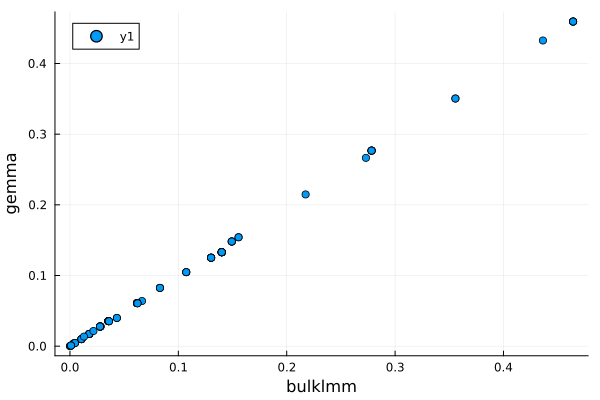

In [103]:
scatter(bulkscan_results_ind_null.L[1:100, samples[1]], gemma_ind_L[1:100, 1], xlab = "bulklmm", ylab = "gemma")

In [104]:
test_bulkscan_ind_null = bulkscan_results_ind_null.L[:, samples];

In [105]:
toRemove = findall(isinf.(gemma_ind_L))

5-element Vector{CartesianIndex{2}}:
 CartesianIndex(2977, 873)
 CartesianIndex(2978, 873)
 CartesianIndex(2979, 873)
 CartesianIndex(2980, 873)
 CartesianIndex(2981, 873)

In [106]:
for bad in toRemove
    i = bad[1];
    j = bad[2];
    
    test_bulkscan_ind_null[i, j] = 0;
    gemma_ind_L[i, j] = 0.0;
end

In [107]:
mean(abs.(bulkscan_results_ind_null.L[:, samples] .- gemma_ind_L))

0.019851232327575206

In [108]:
mean((bulkscan_results_ind_null.L[:, samples] .- gemma_ind_L) .> 0.0)

0.7249102581614534

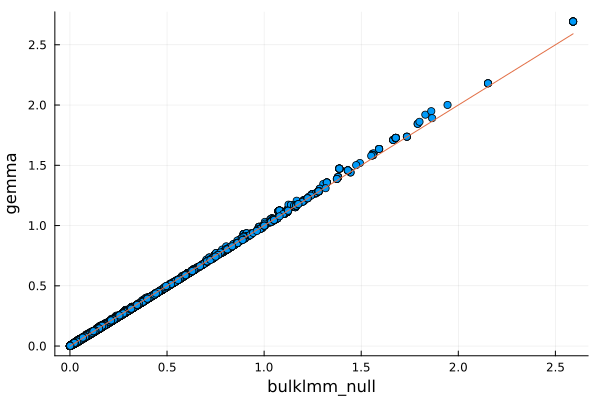

In [109]:
scatter(bulkscan_results_ind_null.L[:, samples[1]], gemma_ind_L[:, 1], xlab = "bulklmm_null", ylab = "gemma", legend = false)
plot!(x -> x)

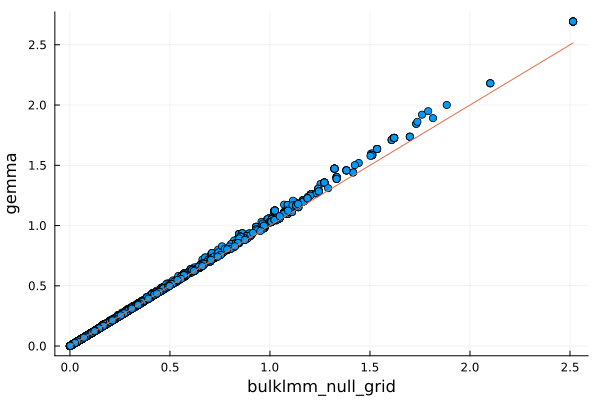

In [110]:
scatter(bulkscan_results_ind_null_grid.L[:, samples[1]], gemma_ind_L[:, 1], xlab = "bulklmm_null_grid", ylab = "gemma", legend = false)
plot!(x -> x)

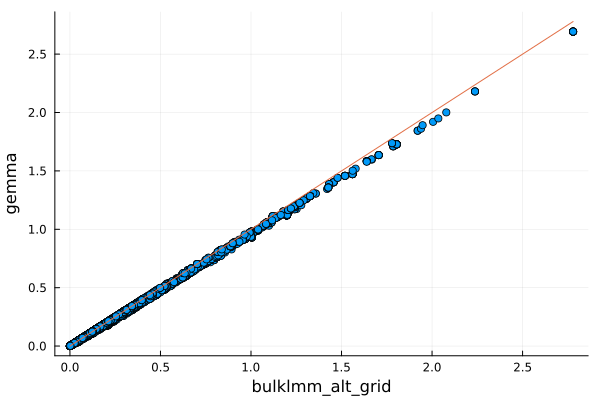

In [111]:
scatter(bulkscan_results_ind_alt_grid.L[:, samples[1]], gemma_ind_L[:, 1], xlab = "bulklmm_alt_grid", ylab = "gemma", legend = false)
plot!(x -> x)

In [112]:
bulkscan_L_ind_null = bulkscan_results_ind_null.L[:, samples];

In [113]:
bulkscan_L_ind_null_grid = bulkscan_results_ind_null_grid.L[:, samples];

In [114]:
bulkscan_L_ind_alt_grid = bulkscan_results_ind_alt_grid.L[:, samples];

In [115]:
bulkscan_L_strains_null = bulkscan_results_strains_null.L[:, samples];

In [116]:
bulkscan_L_strains_null_grid = bulkscan_results_strains_null_grid.L[:, samples];

In [117]:
bulkscan_L_strains_alt_grid = bulkscan_results_strains_alt_grid.L[:, samples];

In [150]:
#= 
writedlm("output/bulklmm_L_ind_null_grid10.txt", bulkscan_results_ind_null_grid10.L[:, samples], '\t');
writedlm("output/bulklmm_L_ind_null_grid20.txt", bulkscan_results_ind_null_grid20.L[:, samples], '\t');
writedlm("output/bulklmm_L_ind_null_grid100.txt", bulkscan_results_ind_null_grid100.L[:, samples], '\t')
=#

In [151]:
#= 
writedlm("output/bulklmm_L_ind_alt_grid10.txt", bulkscan_results_ind_alt_grid10.L[:, samples], '\t');
writedlm("output/bulklmm_L_ind_alt_grid20.txt", bulkscan_results_ind_alt_grid20.L[:, samples], '\t');
writedlm("output/bulklmm_L_ind_alt_grid100.txt", bulkscan_results_ind_alt_grid100.L[:, samples], '\t')
=#

In [162]:
timing_null_exact_samples = @elapsed bulkscan_null(lp_ind_Y[:, samples], geno_ind, kinship_ind_from_strains; 
                                                            reml = true);

In [152]:
timing_null_grid_samples10 = @elapsed bulkscan_null_grid(lp_ind_Y[:, samples], geno_ind, kinship_ind_from_strains, grid_list10; 
                                                            reml = true);

In [153]:
timing_null_grid_samples20 = @elapsed bulkscan_null_grid(lp_ind_Y[:, samples], geno_ind, kinship_ind_from_strains, grid_list20;
                                                            reml = true);

In [154]:
timing_null_grid_samples100 = @elapsed bulkscan_null_grid(lp_ind_Y[:, samples], geno_ind, kinship_ind_from_strains, grid_list100;
                                                             reml = true);

In [158]:
timing_alt_grid_samples10 = @elapsed bulkscan_alt_grid(lp_ind_Y[:, samples], geno_ind, kinship_ind_from_strains, grid_list10;
                                                     reml = true);

In [159]:
timing_alt_grid_samples20 = @elapsed bulkscan_alt_grid(lp_ind_Y[:, samples], geno_ind, kinship_ind_from_strains, grid_list20;
                                                          reml = true);

In [160]:
timing_alt_grid_samples100 = @elapsed bulkscan_alt_grid(lp_ind_Y[:, samples], geno_ind, kinship_ind_from_strains, grid_list100;
                                                           reml = true);

In [ ]:
timing_null_exact_samples

In [161]:
hcat([timing_null_grid_samples10, timing_null_grid_samples20, timing_null_grid_samples100],
     [timing_alt_grid_samples10, timing_alt_grid_samples20, timing_alt_grid_samples100])

3×2 Matrix{Float64}:
 0.80536   7.28355
 1.39169  13.9023
 3.64088  67.2552

## Study of grid_size effects on results:

In [79]:
function subdivide_interval(num_subintervals::Int)
    if num_subintervals <= 0
        error("Invalid number of sub-intervals.")
    end
    
    subinterval_size = 1.0 / num_subintervals
    subintervals = zeros(Float64, num_subintervals, 2)
    
    for i in 1:num_subintervals
        start_point = (i - 1) * subinterval_size
        end_point = i * subinterval_size
        subintervals[i, :] = [start_point, end_point]
    end
    
    subintervals[end, 2] = 0.99999
    return subintervals
end

subdivide_interval (generic function with 1 method)

In [80]:
list_of_grid_lists = Array{Array{Float64, 1}, 1}(undef, 100);
for i in 1:100
    temp = subdivide_interval(i)[:, 2];
    temp = vcat(0.0, temp);
    list_of_grid_lists[i] = temp;
end

In [81]:
timings_each_grid = zeros(100);
k = 0;
@time begin
    for grid_list in list_of_grid_lists
        
        k = k+1;
        timings_each_grid[k] = @elapsed bulkscan_null_grid(lpst_ind_Y, geno_ind, kinship_ind_from_strains, grid_list);

    end
end

2599.251524 seconds (2.45 G allocations: 2.286 TiB, 63.02% gc time, 0.00% compilation time)


In [82]:
bulkscan_results_ind_null.L

7321×32445 Matrix{Float64}:
 0.839415  0.160061   0.388548   …  0.0824518  0.247676   0.0039923
 0.839415  0.160061   0.388548      0.0824518  0.247676   0.0039923
 0.839415  0.160061   0.388548      0.0824518  0.247676   0.0039923
 0.839415  0.160061   0.388548      0.0824518  0.247676   0.0039923
 0.839415  0.160061   0.388548      0.0824518  0.247676   0.0039923
 0.839415  0.160061   0.388548   …  0.0824518  0.247676   0.0039923
 0.839415  0.160061   0.388548      0.0824518  0.247676   0.0039923
 0.839415  0.160061   0.388548      0.0824518  0.247676   0.0039923
 0.839415  0.160061   0.388548      0.0824518  0.247676   0.0039923
 0.839415  0.160061   0.388548      0.0824518  0.247676   0.0039923
 0.839415  0.160061   0.388548   …  0.0824518  0.247676   0.0039923
 0.839415  0.160061   0.388548      0.0824518  0.247676   0.0039923
 0.365837  0.184516   0.294971      0.116527   0.0869291  0.080898
 ⋮                               ⋱                        
 0.273372  0.0544232  0.342331

In [83]:
absErrors_each_grid = zeros(100);

k = 0;
@time begin
    
    for grid_list in list_of_grid_lists
        
        k = k+1;
        
        null_grid_k_results = bulkscan_null_grid(lpst_ind_Y, geno_ind, kinship_ind_from_strains, grid_list).L;
        absErrors_each_grid[k] = mean(abs.(null_grid_k_results .- bulkscan_results_ind_null.L))

    end
end

2810.763818 seconds (2.45 G allocations: 2.459 TiB, 58.97% gc time, 0.00% compilation time)


In [97]:
fit_h2_timings = wls(reshape(timings_each_grid, :, 1), hcat(ones(100), collect(1:100).*1.0), ones(100), [0.0, 0.0]);

In [114]:
coefs_h2_timings = round.(fit_h2_timings.b, digits = 2)

2×1 Matrix{Float64}:
 5.27
 0.41

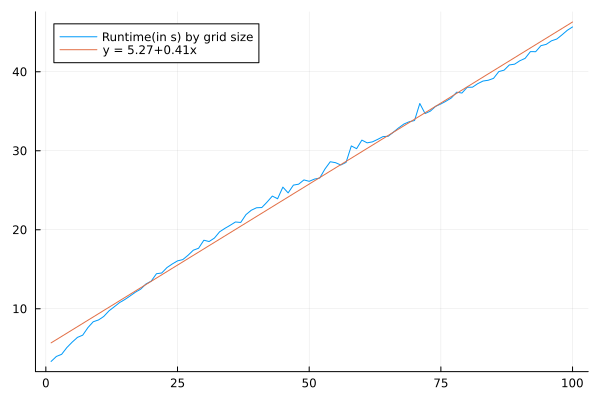

In [115]:
plot(timings_each_grid, label = "Runtime(in s) by grid size");
plot!(x -> fit_h2_timings.b[1]+fit_h2_timings.b[2]*x, label = "y = 5.27+0.41x")

In [99]:
fine_grid = collect(1:99).*0.01;

In [100]:
timings_each_grid

100-element Vector{Float64}:
  3.335316215
  3.967860514
  4.23764162
  5.099011614
  5.777131447
  6.379214508
  6.6591023
  7.626417569
  8.358588146
  8.585541583
  9.030797152
  9.743115522
 10.25805307
  ⋮
 40.96198459
 41.396837546
 41.699223155
 42.55041433
 42.541001658
 43.304311362
 43.468343699
 43.916737842
 44.141378263
 44.673537717
 45.247736699
 45.67334911

In [88]:
fit_h2_timings.b

2×1 Matrix{Float64}:
 5.274779180455757
 0.4102500091513712

In [89]:
5.133367084781798+0.43327207080273666*100

48.46057416505546

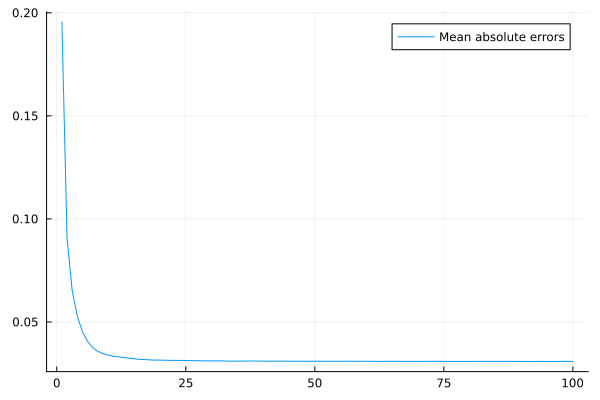

In [117]:
plot(absErrors_each_grid, label = "Mean absolute errors")

In [91]:
findfirst(absErrors_each_grid.<= 0.03)

In [92]:
absErrors_each_grid[5]

0.045053209904235794

In [93]:
h2_df = DataFrame(hcat(timings_each_grid, absErrors_each_grid), ["Timing", "Mean Absolute Difference"])

100×2 DataFrame
 Row │ Timing    Mean Absolute Difference 
     │ Float64   Float64                  
─────┼────────────────────────────────────
   1 │  3.33532                 0.195541
   2 │  3.96786                 0.0905208
   3 │  4.23764                 0.0650286
   4 │  5.09901                 0.0527496
   5 │  5.77713                 0.0450532
   6 │  6.37921                 0.0404799
   7 │  6.6591                  0.0374281
   8 │  7.62642                 0.0356659
   9 │  8.35859                 0.0346013
  10 │  8.58554                 0.0338842
  11 │  9.0308                  0.0332914
  ⋮  │    ⋮                 ⋮
  91 │ 41.6992                  0.0308643
  92 │ 42.5504                  0.0308566
  93 │ 42.541                   0.0308596
  94 │ 43.3043                  0.0308648
  95 │ 43.4683                  0.0308509
  96 │ 43.9167                  0.0308525
  97 │ 44.1414                  0.0308512
  98 │ 44.6735                  0.0308744
  99 │ 45.2477                  0.0308718
 100 │ 45.6733                  0.0308589
                           79 rows omitted

In [94]:
pwd()

"/home/zyu20/git/BulkLMM_Analyses/BXDLongevity"

In [95]:
# CSV.write("output/h2_study/h2_summary.csv", h2_df);